# Business Problem

In the telecom sector, a massive quantity of information is being generated on a day by day foundation because of a sizable customer base. Decision makers and commercial enterprise analysts emphasized that achieving new clients is dearer than maintaining the present ones. Business analysts and purchaser dating management analyzers want to recognize the reason behind churning clients.

Aim: To redict whether the customer is going to churn or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn (1).csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleansing

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df.duplicated().sum()

0

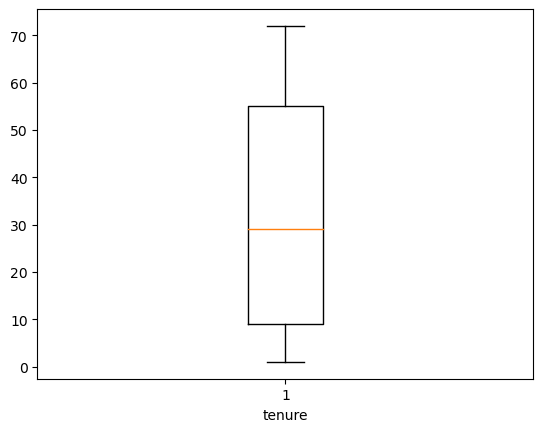

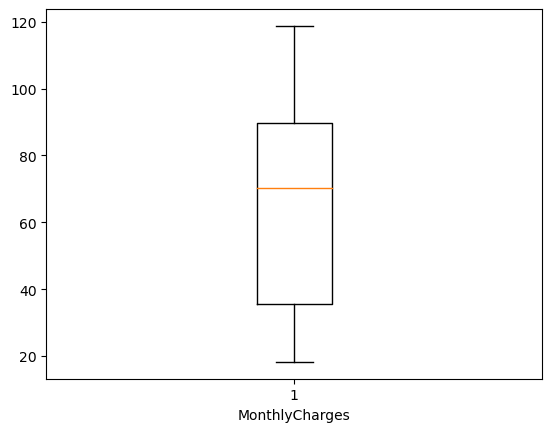

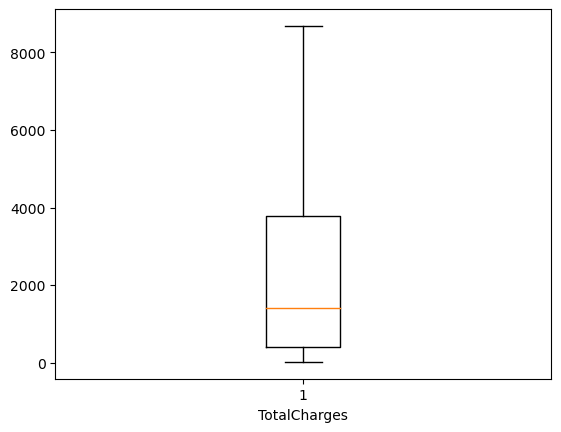

In [13]:
for col in df.columns:
    if df[col].dtype != 'object' and col!='SeniorCitizen':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [14]:
df.drop(['customerID'], axis=1, inplace=True)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [20]:
#Do Visualization

# Model Building

In [21]:
x=df.iloc[:,:-1]
y=df['Churn']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=34)

In [24]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1615,0,0,1,0,49,1,0,2,1,1,1,1,1,1,1,1,0,20.05,923.10
3929,1,0,1,1,50,1,0,0,0,0,0,0,0,0,1,1,0,44.80,2230.85
3353,1,0,1,0,12,1,0,1,0,2,0,0,0,2,0,1,1,85.05,999.80
486,0,0,0,0,15,1,2,1,0,2,0,0,2,2,0,1,2,100.15,1415.00
3712,1,0,0,0,44,1,0,0,2,0,0,2,2,0,1,0,2,65.40,2774.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,0,0,0,0,4,1,0,1,0,2,2,2,2,2,1,1,2,105.65,443.90
6002,1,0,1,0,6,1,2,1,0,0,0,0,2,0,0,1,2,82.85,460.25
2543,1,0,0,0,13,1,2,1,2,0,0,0,2,2,0,0,3,98.15,1230.25
5251,0,1,0,0,5,1,0,1,0,0,0,0,0,0,0,1,3,69.05,318.50


In [25]:
y_train

1615    0
3929    0
3353    0
486     0
3712    0
       ..
3837    1
6002    1
2543    1
5251    1
3495    1
Name: Churn, Length: 5625, dtype: int32

In [26]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2519,1,0,1,0,2,1,2,1,0,0,2,0,2,0,0,1,2,91.45,171.45
1559,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,20.35,45.30
976,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,69.90
4562,0,0,1,1,71,1,2,1,2,2,2,2,2,2,2,0,0,114.60,8100.25
4224,0,0,1,0,71,1,0,2,1,1,1,1,1,1,2,0,3,19.60,1416.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0,0,1,1,72,1,0,1,2,2,2,2,2,2,2,1,0,108.30,7679.65
5740,1,0,1,1,69,0,1,0,2,0,2,2,0,0,2,0,3,39.10,2779.50
6940,0,0,1,1,72,0,1,0,2,2,2,2,0,2,2,0,1,55.65,3880.05
2757,0,0,1,1,69,1,2,1,2,0,2,0,0,0,1,0,0,84.45,5848.60


In [27]:
cx=[0,0,1,1,30,0,2,2,0,1,2,0,1,2,1,3,40.0,300.90]

In [28]:
y_test

2519    0
1559    0
976     1
4562    0
4224    0
       ..
6412    0
5740    0
6940    0
2757    0
356     0
Name: Churn, Length: 1407, dtype: int32

In [29]:
#n_estimators here is basically which is used to tell how many random decision trees we have to take for modelling
rf_model = RandomForestClassifier(n_estimators=50,random_state=23)

In [30]:
rf_model

RandomForestClassifier(n_estimators=50, random_state=23)

In [31]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=23)

In [32]:
rf_pred=rf_model.predict(x_test)

In [33]:
rf_pred

array([1, 0, 1, ..., 0, 0, 0])

In [34]:
y_test

2519    0
1559    0
976     1
4562    0
4224    0
       ..
6412    0
5740    0
6940    0
2757    0
356     0
Name: Churn, Length: 1407, dtype: int32

In [35]:
accuracy_score(y_test,rf_pred)

0.7775408670931059

In [36]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[929, 111],
       [202, 165]], dtype=int64)

<Axes: >

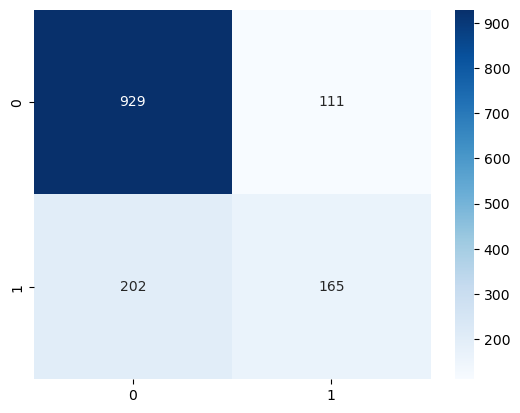

In [37]:
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')

In [38]:
#n here is storing different values of n_estimators
n=[100,150,200,250,300,350,400,450,500,550,600,650,700]

In [39]:
for X in n:
    model = RandomForestClassifier(n_estimators=X,random_state=23)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print('no. of trees: ', X, 'accuracy: ',acc)

no. of trees:  100 accuracy:  77.25657427149964
no. of trees:  150 accuracy:  77.5408670931059
no. of trees:  200 accuracy:  77.39872068230277
no. of trees:  250 accuracy:  77.46979388770433
no. of trees:  300 accuracy:  77.46979388770433
no. of trees:  350 accuracy:  77.39872068230277
no. of trees:  400 accuracy:  77.68301350390902
no. of trees:  450 accuracy:  77.82515991471215
no. of trees:  500 accuracy:  77.5408670931059
no. of trees:  550 accuracy:  77.46979388770433
no. of trees:  600 accuracy:  77.3276474769012
no. of trees:  650 accuracy:  77.5408670931059
no. of trees:  700 accuracy:  77.3276474769012


In [40]:
#Using GridSearchcv for futher optimization
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None,5,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy']
}

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
classifier2=RandomForestClassifier(random_state=23)

grid_search = GridSearchCV(estimator=classifier2, param_grid=param_grid, cv=2)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

1. Accuracy: Measures the proportion of correctly classified instances.

Formula: TP+TN/(TP+TN+FP+FN)




2. Precision (also called Positive Predictive Value): Measures the proportion of true positive predictions among all positive predictions.

Formula: TP/(TP+FP)




3. Recall (also called Sensitivity, True Positive Rate): Measures the proportion of true positive predictions among all actual positive instances.

Formula: TP/(TP+FN)




4. F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between two metrics.

Formula: 2∗(Precision∗Recall)/(Precision+Recall)




5. Specificity: Measures the proportion of true negative predictions among all actual negative instances.

Formula: TN/(TN+FP)

In [44]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [45]:
new_model =RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 4, min_samples_split=10, n_estimators= 300,random_state=23)

In [46]:
new_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=23)

In [47]:
new_pred=new_model.predict(x_test)

In [74]:
accuracy_score(y_test,new_pred)

0.7889125799573561

In [77]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1040
           1       0.63      0.47      0.54       367

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [78]:
#Testing with random data
#How to pass the data
cx=[0,0,1,1,30,0,2,2,0,1,0,2,0,1,2,1,3,40.0,300.90] #pseudo data

In [79]:
new_model.predict([cx])

C:\Users\Jasmine Ansari\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#Based on the pseudo data the machine have predicted that this customer will not churn